In [1]:
# English

In [2]:
# Chinese to English 

import pandas as pd
import numpy as np

train_from_zh = pd.read_csv("NTCIR-13_MedWeb_en_from_zh_amazon_training.csv")
test = pd.read_csv("NTCIR-13_MedWeb_en_test.csv")

# remove punctuation inside
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

# update training set and test set
train_from_zh = clean_text(train_from_zh,"Tweet")
test = clean_text(test,"Tweet")

# lemmatization
import spacy
from vectorizers import SpacyLemmatizer

import en_core_web_sm
nlp = en_core_web_sm.load()

lemmatizer = SpacyLemmatizer(nlp, join_str=' ', n_threads=1)

lemmas_train_from_zh = lemmatizer(list(train_from_zh.Tweet)) 
tweet_train_from_zh = list(lemmas_train_from_zh) 

lemmas_test = lemmatizer(list(test.Tweet)) 
tweet_test = list(lemmas_test)

# define labels
categories = ['Influenza','Diarrhea','Hayfever','Cough','Headache','Fever','Runnynose','Cold']
y_train = train_from_zh[categories].replace({'n':0, 'p':+1})
y_test = test[categories].replace({'n':0, 'p':+1})

# add stopwords
import nltk
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
stop.extend('haha ugghh ugh uh um oh ok okay boo damn god yu yike yen yay mikos mitsuru shirasu lol sigh 10 100 10000 1004 102 104 320000 968' .split())

 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=set(stop))
X_train = vectorizer.fit_transform(tweet_train_from_zh).toarray()

feature = vectorizer.get_feature_names()

vectorizer_test = CountVectorizer(vocabulary=vectorizer.vocabulary_)
X_test = vectorizer_test.transform(tweet_test).toarray()

print("The vocabulary contains {} unique tokens".format(len(feature)))

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsRestClassifier


# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(C=10, solver='lbfgs', penalty='l2', max_iter=2500, class_weight='balanced'), n_jobs=-1)),
            ])
for category in categories:
    print('**Processing {} sysptoms...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_train, y_train[category].values)
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))
    print('Test precision is {}'.format(precision_score(y_test[category], prediction, average='binary')))
    print('Test recall is {}'.format(recall_score(y_test[category], prediction, average='binary')))
    print('Test f1-score is {}\n'.format(f1_score(y_test[category], prediction, average='binary')))


The vocabulary contains 1904 unique tokens
**Processing Influenza sysptoms...**
Test accuracy is 0.9375
Test precision is 0.35714285714285715
Test recall is 0.8333333333333334
Test f1-score is 0.5

**Processing Diarrhea sysptoms...**
Test accuracy is 0.9765625
Test precision is 0.810126582278481
Test recall is 1.0
Test f1-score is 0.8951048951048951

**Processing Hayfever sysptoms...**
Test accuracy is 0.9265625
Test precision is 0.0
Test recall is 0.0
Test f1-score is 0.0

**Processing Cough sysptoms...**
Test accuracy is 0.9890625
Test precision is 0.9294117647058824
Test recall is 0.9875
Test f1-score is 0.9575757575757576

**Processing Headache sysptoms...**
Test accuracy is 0.9703125
Test precision is 0.8085106382978723
Test recall is 0.987012987012987
Test f1-score is 0.8888888888888888

**Processing Fever sysptoms...**
Test accuracy is 0.91875
Test precision is 0.6814159292035398
Test recall is 0.8279569892473119
Test f1-score is 0.7475728155339806

**Processing Runnynose syspto

In [3]:
# check reassons for Hayfever

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [10]}
grid = GridSearchCV(LogisticRegression(C=10, solver='lbfgs', penalty='l2', max_iter=2500, class_weight='balanced'), param_grid, cv=5) # scoring='roc_auc'
grid.fit(X_train, y_train["Hayfever"].values)

import matplotlib.pyplot as plt
import mglearn
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, feature, n_top_features=25)
plt.savefig("hayfever1EngfromZh")
plt.show()

/Users/boxulu/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/boxulu/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


<Figure size 1500x500 with 1 Axes>

In [4]:
############################################################

In [5]:
# Japanese to English 
train_from_ja = pd.read_csv("NTCIR-13_MedWeb_en_from_ja_amazon_training.csv")
train_from_ja = clean_text(train_from_ja,"Tweet")

# lemmatization
lemmas_train_from_ja = lemmatizer(list(train_from_ja.Tweet)) 
tweet_train_from_ja = list(lemmas_train_from_ja)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=set(stop))
X_train = vectorizer.fit_transform(tweet_train_from_ja).toarray()

feature = vectorizer.get_feature_names()

vectorizer_test = CountVectorizer(vocabulary=vectorizer.vocabulary_)
X_test = vectorizer_test.transform(tweet_test).toarray()

print("The vocabulary contains {} unique tokens".format(len(feature)))

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsRestClassifier


# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(C=10, solver='lbfgs', penalty='l2', max_iter=2500, class_weight='balanced'), n_jobs=-1)),
            ])
for category in categories:
    print('**Processing {} sysptoms...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_train, y_train[category].values)
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))
    print('Test precision is {}'.format(precision_score(y_test[category], prediction, average='binary')))
    print('Test recall is {}'.format(recall_score(y_test[category], prediction, average='binary')))
    print('Test f1-score is {}\n'.format(f1_score(y_test[category], prediction, average='binary')))

The vocabulary contains 1654 unique tokens
**Processing Influenza sysptoms...**
Test accuracy is 0.9203125
Test precision is 0.30985915492957744
Test recall is 0.9166666666666666
Test f1-score is 0.46315789473684216

**Processing Diarrhea sysptoms...**
Test accuracy is 0.9578125
Test precision is 0.7126436781609196
Test recall is 0.96875
Test f1-score is 0.8211920529801324

**Processing Hayfever sysptoms...**
Test accuracy is 0.9296875
Test precision is 1.0
Test recall is 0.021739130434782608
Test f1-score is 0.042553191489361694

**Processing Cough sysptoms...**
Test accuracy is 0.984375
Test precision is 0.9069767441860465
Test recall is 0.975
Test f1-score is 0.9397590361445783

**Processing Headache sysptoms...**
Test accuracy is 0.978125
Test precision is 0.8539325842696629
Test recall is 0.987012987012987
Test f1-score is 0.9156626506024096

**Processing Fever sysptoms...**
Test accuracy is 0.9171875
Test precision is 0.6538461538461539
Test recall is 0.9139784946236559
Test f1-s

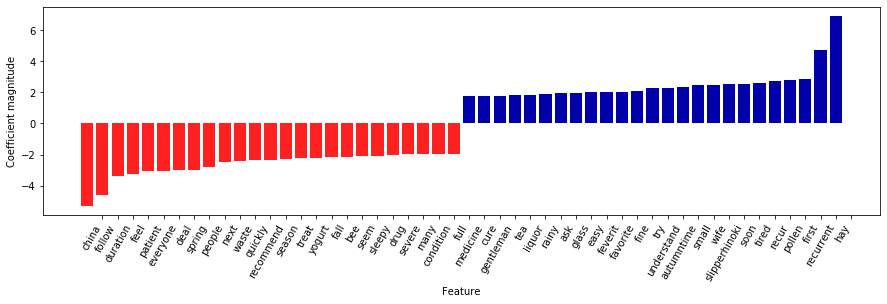

In [6]:
# check reassons for Hayfever

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [10]}
grid = GridSearchCV(LogisticRegression(C=10, solver='lbfgs', penalty='l2', max_iter=2500, class_weight='balanced'), param_grid, cv=5) # scoring='roc_auc'
grid.fit(X_train, y_train["Hayfever"].values)

import matplotlib.pyplot as plt
import mglearn
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, feature, n_top_features=25)
plt.savefig("hayfever1EngfromJa")